In [820]:
#import the packages and data files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

movies_raw = pd.read_table("movies.txt",header = None)
rating_raw = pd.read_csv("ratings.csv", header = None)
rating_test = pd.read_csv("ratings_test.csv", header = None)
rating_array = np.array(rating_raw)

# find the dimension of the matrix
nrow = int(np.max(rating_array[:,0]))
ncol = int(np.max(rating_array[:, 1]))
#initialize the m matrix
M_matrix = np.zeros(shape = (nrow, ncol))

In [821]:
#parse the M matrix from data
for i in range(len(rating_array)):
    row = int(rating_array[i][0]) - 1
    col = int(rating_array[i][1]) - 1
    M_matrix[row][col] = rating_array[i][2]
    
# notate the location of value in the matrix
M_value = np.array(np.where(M_matrix != 0))
M_value = M_value.T

In [822]:
#define the function to update u
# def u_update(u, v):
#     identity = 0.25*np.identity(10)
#     for i in range(nrow):
#         vsum1 = np.zeros(shape = (10, 10))
#         vsum2 = np.zeros(shape = (10, 1))
#         for j in range(ncol):
#             if M_matrix[i][j] != 0:
#                 vsum1 += v[:, j] * v[:, j].T
#                 vsum2 += (M_matrix[i][j] * v[:, j]).reshape(10, 1)
#         temp = np.linalg.inv(identity + vsum1)
#         u[i] = np.dot(temp, vsum2).reshape(1, 10)
#     return u
# def u_update(u, v):
#     identity = 0.25*np.identity(10)
#     for i in range(nrow):
#         vsum1 = np.zeros(shape = (10, 10))
#         vsum2 = np.zeros(shape = (10, 1))
#         for j in M_value[np.where(M_value[:,0] == i)][:,1]:
#             vsum1 += v[:, j] * v[:, j].T
#             vsum2 += (M_matrix[i][j] * v[:, j]).reshape(10, 1)
#         temp = np.linalg.inv(identity + vsum1)
#         u[i] = np.dot(temp, vsum2).reshape(1, 10)
#     return u
def u_update(u, v):
    vsum1 = {}
    vsum2 = {}
    identity = 0.25*np.identity(10)
    for [i, j] in M_value:
        if i not in vsum1:
            vsum1[i] = v[:, j] * v[:, j].T
            vsum2[i] = (M_matrix[i][j] * v[:, j]).reshape(10, 1)
        else:
            vsum1[i] += v[:, j] * v[:, j].T
            vsum2[i] += (M_matrix[i][j] * v[:, j]).reshape(10, 1)
    for i in range(len(vsum1)):
        temp = np.linalg.inv(identity + vsum1[i])
        u[i] = np.dot(temp, vsum2[i]).reshape(1, 10)
    return u

In [823]:
#initialize u and v
def initialize():
    u_matrix = np.random.normal(0, 1, size = (nrow, 10))
    v_matrix = np.random.normal(0, 1, size = (10, ncol))
    return np.matrix(u_matrix), np.matrix(v_matrix)

In [824]:
#define the function to update v
# def v_update(u, v):
#     identity = 0.25*np.identity(10)
#     for j in range(ncol):
#         usum1 = np.zeros(shape = (10, 10))
#         usum2 = np.zeros(shape = (10, 1))
#         for i in M_value[np.where(M_value[:,1] == j)][:,0]:
#             usum1 += u[i,:].T * u[i,:]
#             usum2 += M_matrix[i][j] * u[i,:].T
#         temp = np.linalg.inv(identity + usum1)
#         v[:,j] = np.dot(temp, usum2)
#     return v
def v_update(u, v):
    usum1 = {}
    usum2 = {}
    identity = 0.25*np.identity(10)
    for [i, j] in M_value:
        if j not in usum1:
            usum1[j] = u[i,:].T * u[i,:]
            usum2[j] = M_matrix[i][j] * u[i,:].T
        else:
            usum1[j] += u[i,:].T * u[i,:]
            usum2[j] += M_matrix[i][j] * u[i,:].T
    for j in range(len(usum1)):
        if j in usum1:
            temp = np.linalg.inv(identity + usum1[j])
            v[:,j] = np.dot(temp, usum2[j])
        else:
            v[:,j] = np.zeros(shape = (10, 1))
    return v
        

In [825]:
#calculate the joint likelyhood
def likelihoodcal(u, v):
    conditional = 0
    prior_u = 0
    prior_v = 0
    const_prior = -5*math.log(2*math.pi)
    const_condi = -0.5 * math.log(0.5*math.pi)
    for i in range(nrow):
        prior_u += const_prior - 0.5 *(u[i]*u[i].T)     
    for j in range(ncol):

        prior_v += const_prior - 0.5*(v[:,j].T * v[:,j])
    for [i, j] in M_value:
        conditional += const_condi - 2 * ((M_matrix[i][j] - u[i]*v[:,j])**2)

    return float(conditional + prior_u + prior_v)
                

In [826]:
def main1():
    likelihood = []
    utrain = []
    vtrain = []
    for t in range(10):
        u, v = initialize()
        temp = []
        for i in range(100):
            u = u_update(u, v)
            v = v_update(u, v)
            temp.append(likelihoodcal(u, v))
        likelihood.append(temp + [])
        utrain.append(u.copy())
        vtrain.append(v.copy())
        
    return utrain, vtrain, likelihood

In [827]:
utrain, vtrain, likelihood = main1()

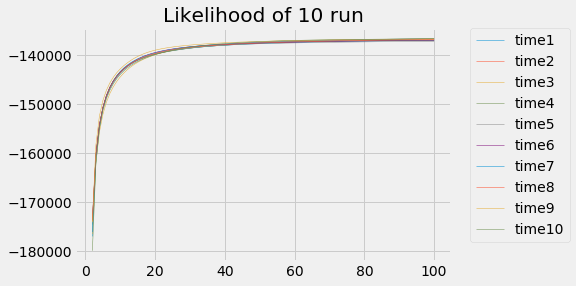

In [828]:
plt.style.use('fivethirtyeight')
# Fixing random state for reproducibility
fig, ax = plt.subplots()

ax.plot(range(2, 101), likelihood[0][1:], label = "time1" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[1][1:], label = "time2" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[2][1:], label = "time3" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[3][1:], label = "time4" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[4][1:], label = "time5" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[5][1:], label = "time6" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[6][1:], label = "time7" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[7][1:], label = "time8" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[8][1:], label = "time9" , linewidth=0.5)
ax.plot(range(2, 101), likelihood[9][1:], label = "time10" , linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("Likelihood of 10 run")

plt.show()

In [829]:
test = np.array(rating_test)

In [830]:
def calculate_L(u, v):
    l_u = 0
    l_v = 0
    l_m = 0
    for i in range(nrow):
        l_u += -0.5 * ((u[i] * u[i].T))
#         for j in range(ncol):
#             if M_matrix[i][j] != 0:
#                 l_m += -2 * ((M_matrix[i][j] - u[i]*v[:,j]) ** 2)
    for j in range(ncol):
        l_v += -0.5 * (v[:,j].T * v[:, j])
    
    for [i, j] in M_value:
        l_m += -2 * ((M_matrix[i][j] - u[i]*v[:,j]) ** 2)
    
    return float(l_u + l_v + l_m)
    
L_function = []
for i in range(10):
    L_function.append(calculate_L(utrain[i], vtrain[i]))


In [831]:
def calculate_rmse(u, v):
    predict = []
    for i in range(test.shape[0]):
        u_index = int(test[i][0]) - 1
        v_index = int(test[i][1]) - 1
        predict.append(np.dot(u[u_index], v[:,v_index]))
    predict = np.array(predict)
    return np.sum((predict.reshape(test.shape[0],) - test[:,2]) ** 2)/test.shape[0]

#calculate the RMSE for every run
RMSE = []
for i in range(10):
    RMSE.append(calculate_rmse(utrain[i], vtrain[i]))

In [832]:
df = []
df.append(L_function)
df.append(RMSE)
df = -1 * np.array(df).T
df = -1 * df[np.argsort(df[:, 0])]

In [833]:
table = {'Object Function' : pd.Series(L_function, index=range(1, 11)),'RMSE' : pd.Series(RMSE, index=range(1, 11))}
show = pd.DataFrame(table, columns=['Object Function', 'RMSE'])
show

,Object Function,RMSE
1,-91398.044246,1.245980
2,-91105.539183,1.246801
3,-91259.318976,1.233302
4,-91359.367381,1.219105
5,-91578.882546,1.279882
6,-91382.476820,1.243551
7,-91038.349094,1.192291
8,-91218.430402,1.216273
9,-91050.664455,1.223734
10,-91074.485949,1.184220


In [834]:
table_s = {'Object Function' : pd.Series(df[:, 0], index=range(1, 11)),'RMSE' : pd.Series(df[:, 1], index=range(1, 11))}
show_s = pd.DataFrame(table_s, columns=['Object Function', 'RMSE'])
show_s

,Object Function,RMSE
1,-91038.349094,1.192291
2,-91050.664455,1.223734
3,-91074.485949,1.184220
4,-91105.539183,1.246801
5,-91218.430402,1.216273
6,-91259.318976,1.233302
7,-91359.367381,1.219105
8,-91382.476820,1.243551
9,-91398.044246,1.245980
10,-91578.882546,1.279882


In [835]:
#questions 2
index_1 = int((np.where(np.array(movies_raw) == 'Star Wars (1977)')[0]))
index_2 = int((np.where(np.array(movies_raw) == 'My Fair Lady (1964)')[0]))
index_3 = int((np.where(np.array(movies_raw) == 'GoodFellas (1990)')[0]))

In [836]:
np.argmax(L_function)

6

In [837]:
v_min = vtrain[np.argmax(L_function)]
v_starw = v_min[:, index_1]
v_lady = v_min[:, index_2]
v_fellas = v_min[:, index_3]

In [838]:
distance_1 = np.linalg.norm((v_starw - v_min), axis = 0)
distance_2 = np.linalg.norm((v_lady - v_min), axis = 0)
distance_3 = np.linalg.norm((v_fellas - v_min), axis = 0)

In [839]:
closest_index1 = np.argsort(distance_1)[:11][1:]
closest_index2 = np.argsort(distance_2)[:11][1:]
closest_index3 = np.argsort(distance_3)[:11][1:]

In [840]:
result = []
for index in [closest_index1, closest_index2, closest_index3]:    
    for element in index:
        result.append(str(np.array(movies_raw)[element][0]))

In [841]:
closest_1 = result[:10]
closest_2 = result[10:20]
closest_3 = result[20:]

In [842]:
table_closest = {'Star Wars (1977)' : pd.Series(closest_1, index=range(1, 11)),'My Fair Lady (1964)' : pd.Series(closest_2, index=range(1, 11)),
          'GoodFellas (1990)':pd.Series(closest_3, index = range(1, 11))}
show_closest = pd.DataFrame(table_closest)
show_closest

,GoodFellas (1990),My Fair Lady (1964),Star Wars (1977)
1,"Good, The Bad and The Ugly, The (1966)","Sound of Music, The (1965)","Empire Strikes Back, The (1980)"
2,Bonnie and Clyde (1967),Victor/Victoria (1982),Raiders of the Lost Ark (1981)
3,Full Metal Jacket (1987),Mary Poppins (1964),Return of the Jedi (1983)
4,Once Upon a Time in the West (1969),"American in Paris, An (1951)",Manon of the Spring (Manon des sources) (1986)
5,"Godfather: Part II, The (1974)",Babe (1995),"Wrong Trousers, The (1993)"
6,Casino (1995),Gone with the Wind (1939),"Usual Suspects, The (1995)"
7,Apocalypse Now (1979),Widows' Peak (1994),Love in the Afternoon (1957)
8,Cool Hand Luke (1967),Shadowlands (1993),Indiana Jones and the Last Crusade (1989)
9,Alien (1979),Cinderella (1950),"Sting, The (1973)"
10,"Godfather, The (1972)",Snow White and the Seven Dwarfs (1937),My Man Godfrey (1936)


In [843]:
dis_1 = distance_1[closest_index1]
dis_2 = distance_2[closest_index2]
dis_3 = distance_3[closest_index3]

In [844]:
table_closest2 = {'Star Wars (1977) distance' : pd.Series(dis_1, index=range(1, 11)),'My Fair Lady (1964) distance' : pd.Series(dis_2, index=range(1, 11)),
          'GoodFellas (1990) distance':pd.Series(dis_3, index = range(1, 11))}
show_closest2 = pd.DataFrame(table_closest2)
show_closest2

,GoodFellas (1990) distance,My Fair Lady (1964) distance,Star Wars (1977) distance
1,0.508438,0.929460,0.352890
2,0.692948,0.967567,0.601567
3,0.716061,0.975687,0.651301
4,0.728243,0.983534,0.657293
5,0.779609,1.090169,0.700069
6,0.799471,1.109217,0.808380
7,0.831925,1.126381,0.836625
8,0.836140,1.127998,0.841561
9,0.888907,1.165938,0.953060
10,0.917189,1.191135,0.960067


In [845]:
np.where(np.array(movies_raw) == "Sound of Music, The (1965)")

(array([142]), array([0]))

In [846]:
np.where(np.array(movies_raw) == 'My Fair Lady (1964)')

(array([484]), array([0]))

In [847]:
np.linalg.norm(vtrain[5][:,142] - vtrain[6][:,484])

3.2448621894182392